# Autoencoders 2 (FYI)
* so NN are versatile
* class for reference (if you need in future and dont know classes - can be helpful)
* class using Python classes - dont worry if you have never used it before, you can still apply it to your own problems as the structure of the autoencoder class has a simple pattern to reproduce
* I will show different ways to implement autoencoders
* do not only compress
* rather extract most important features
* autoencoders used NASA in this paper: https://ieeexplore.ieee.org/document/9461879
(this paper is also here in the directory of this notebook)

* Autoencoders are unsupervised neural network models that summarize the general properties of data in fewer parameters while learning how to reconstruct it after compression


An autoencoder consists of a **pair of deep learning networks**, an encoder and decoder. The encoder learns an efficient way of encoding input into a smaller dense representation, called the bottleneck layer. After training, the decoder converts this representation back to the original input.

Autoencoder Architecture

Autoencoder generally comprises of two major components:-

    Encoder – This section takes the input data and then performs the compression of it for obtaining the data in latent-space.
    Decoder – The decoder component follows the encoder in the architecture, it takes the output generated by the encoder and then tries to reconstruct the actual input

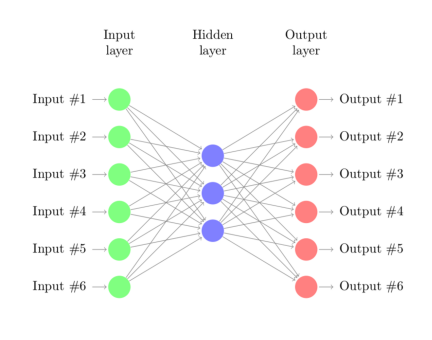

In [1]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(15,6))
ax.imshow(plt.imread('imgs/autoencoders_schematic.png'))
ax.set_axis_off()

* input layer
* bottleneck layer or latent layer
* output layers

One important characteristic of autoencoders is that they can work in an unsupervised manner, which eliminates the need to label the training data, whether by hand or artificially.

## Use cases for autoencoders

* Denoising
  * Denoising is a technique used for removing noise i.e. errors from image data. Along with this, denoising also helps in preprocessing of the images. In case of optical character recognition applications, denoising is majorly done with the help of autoencoders.

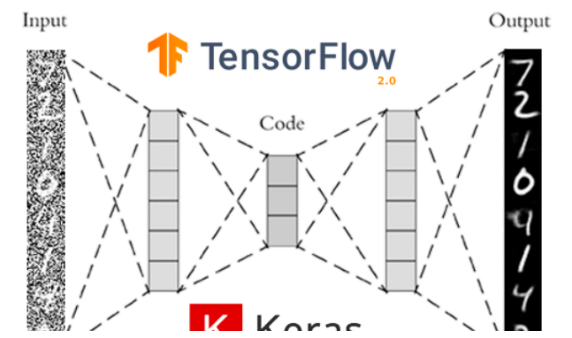

In [2]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(10,6))
ax.imshow(plt.imread('imgs/denoising.png'))
ax.set_axis_off()

In the above illustration, initially, a digit is provided as an input to the autoencoder. The encoder creates a smaller and compressed version of the input through the latent representation of the digit. Lastly, the operations of the decoder take place, whose aim is to produce copies of input by minimizing the mean squared error between the actual input (available as a dataset) and duplicate input (produced by the decoder).

* Image Generation
  * A variant of Autoencoders i.e. Variational Autoencoder is used for generating new images that are similar to the input images.
* Dimensionality reduction
  * Autoencoders for dimensionality reduction are used to compress the input into the smallest representation possible to reproduce the input with the smallest loss.
* Image compression  
  * Researchers are also starting to explore ways that autoencoders can be used to improve compression ratios for video and images compared to traditional statistical techniques. 
  * That may sound like image compression, but the biggest difference between an autoencoder and a general purpose image compression algorithms is that in case of autoencoders, the compression is achieved by learning on a training set of data. While reasonable compression is achieved when an image is similar to the training set used, autoencoders are poor general-purpose image compressors; JPEG compression will do vastly better.  
* Anomaly detection
  * Autoencoders used for anomaly detection use the measured loss between the input and the reconstructed output. If, after running a sample through the autoencoder, the error between the input and the output is considered too high, then that sample represents one that the autoencoder cannot reconstruct, which is anomalous to the trained dataset.

# Autoencoder Convolutional

## Denoising autoencoder using traditional implementation (as we have learned during the whole course)

We have a dataset of images of size 28x28 and we use them as a vector of 784 numbers between [0, 1]

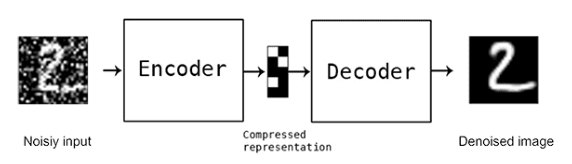

In [3]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(10,6))
ax.imshow(plt.imread('imgs/denoising2.png'))
ax.set_axis_off()

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Conv2D, MaxPooling2D
# UpSampling2D is just a simple scaling up of the image by using nearest neighbour or bilinear upsampling, so nothing smart. Advantage is it's cheap.

In [6]:
(X_train, _), (X_test, _)=tf.keras.datasets.mnist.load_data() 
#(x_train, _), (x_test, _) = mnist.load_data()
X_train=X_train[0:10000]
X_test=X_test[0:10000]
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))

### Notice I did not import  y_train, y_test!!

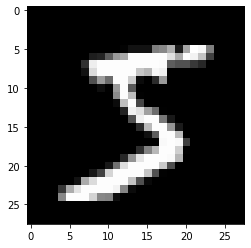

In [7]:
plt.gray()
plt.imshow(X_train[0].reshape(28,28))

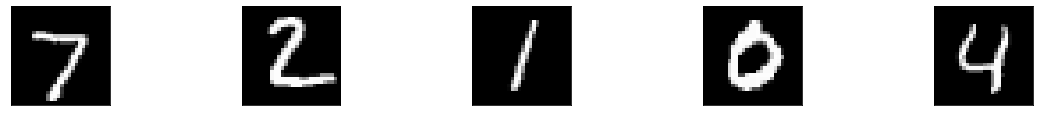

In [8]:
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
plt.show()

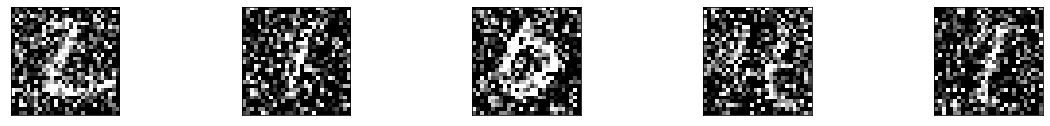

In [9]:
noise_factor = 0.6
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)
#Here is how the noisy images look right now.
plt.figure(figsize=(20, 2))
for i in range(1, 5 + 1):
    ax = plt.subplot(1, 5, i)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Conv2DTranspose # (Deconvolution)

### traditional way of implementation using simple function and creating Sequential model:

In [11]:
def get_model(input_shape):
    model = Sequential([InputLayer(input_shape=input_shape),
                        Conv2D(filters=16, kernel_size=3, strides=2, activation= 'relu', padding='same'),
                        Conv2D(filters=8, kernel_size=3, strides=2, activation= 'relu', padding='same'),
                        
                        Conv2DTranspose(filters=8, kernel_size=3, strides=2, activation= 'relu', padding='same'),
                        Conv2DTranspose(filters=16, kernel_size=3, strides=2, activation= 'relu', padding='same'),
                        Conv2D(filters=1,kernel_size=3,activation='sigmoid', padding= 'same')])
    return model

# Conv2DTranspose - deconvolution layer

In [12]:
model=get_model(X_train_noisy[0].shape)

In [13]:
model.compile(optimizer= 'adam', loss = 'binary_crossentropy')

### I will now train: images WITH noise (input) vs images WITHOUT noise (targets)
because I want the NN to learn whats is the 'correlation' between those two in order to  'predict' how an image with noise should look without noise.

In [14]:
model.fit(X_train_noisy, X_train,
                epochs=5,
                batch_size=128,
                validation_data=(X_test_noisy, X_test))

Epoch 1/5
79/79 [==============================] - 8s 94ms/step - loss: 0.5280 - val_loss: 0.3915
Epoch 2/5
79/79 [==============================] - 7s 91ms/step - loss: 0.3012 - val_loss: 0.2286
Epoch 3/5
79/79 [==============================] - 7s 91ms/step - loss: 0.2001 - val_loss: 0.1827
Epoch 4/5
79/79 [==============================] - 7s 93ms/step - loss: 0.1674 - val_loss: 0.1536
Epoch 5/5
79/79 [==============================] - 7s 93ms/step - loss: 0.1465 - val_loss: 0.1412


#### now I will compare the input (original image) with the output (decoded image)
* remember the original image enters the autoencoder, then its compressed then decompressed

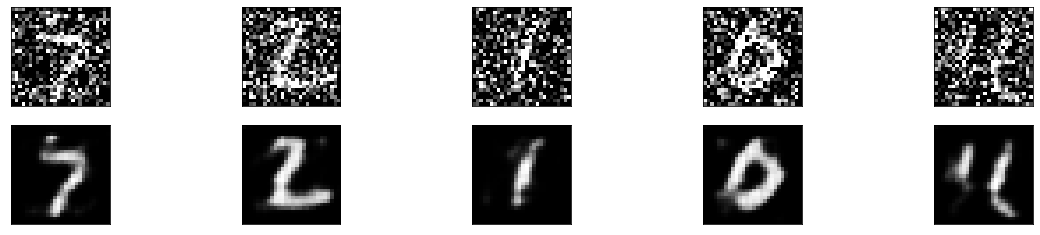

In [15]:
pred = model.predict(X_test_noisy)
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

* we have not look at how the compressed image would look like (what is your guess?)

## Denoising autoencoder using using classes
* in Physics you can live without them but at some points you will meet them: CLASSES
In Python EVERYTHIN IS AN OBJECT
the importation of the modules is slightly different...

In [42]:
print(type(123))

<class 'int'>


In [16]:
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

We have create the same network using TensorFlow’s Subclassing API. We can write our own class that **inherite** the Model class in our Denoise class and define the network as individual  **attributes** encoder and decoder  (We have used an **attribute** of an object before when we called `array.shape` - note its without parenthesis `()`. `object.name` is a attribute `object.name()` is a method)

In [53]:
x=np.array([[1,2,3]])
print(x)
print(x.shape) # attribute
print(x.tolist()) # method
print(x)

[[1 2 3]]
(1, 3)
[[1, 2, 3]]
[[1 2 3]]


In [63]:
# https://www.tensorflow.org/api_docs/python/tf/keras/Model
class Denoise(Model):
    
  def __init__(self,input_shape):
    super().__init__()
    self.encoder = tf.keras.Sequential([
                               layers.InputLayer(input_shape),
                               layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
                               layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
                               layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
                               layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
                               layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
# `funcion call()` - calls the model on new inputs and returns the outputs as tensors.

Separating the encoder and decoder makes it more flexible.

#### now we can pass to the class Denoise shape of the input (as done before with the function) and create the model called `autoencoder`
* then we can compile it and train as usual!
* as the `Denoise` inherits everything from `Model` we can make a history plot as before 

In [64]:
autoencoder = Denoise(X_train_noisy[0].shape)

In [65]:
autoencoder.compile(optimizer='adam', loss = 'binary_crossentropy')

In [66]:
history=autoencoder.fit(X_train_noisy, X_train,
                epochs=5,
                shuffle=True,
                validation_data=(X_test_noisy, X_test))

Epoch 1/5
313/313 [==============================] - 9s 28ms/step - loss: 0.2928 - val_loss: 0.1463
Epoch 2/5
313/313 [==============================] - 8s 27ms/step - loss: 0.1393 - val_loss: 0.1346
Epoch 3/5
313/313 [==============================] - 8s 27ms/step - loss: 0.1337 - val_loss: 0.1321
Epoch 4/5
313/313 [==============================] - 8s 26ms/step - loss: 0.1317 - val_loss: 0.1304
Epoch 5/5
313/313 [==============================] - 8s 26ms/step - loss: 0.1308 - val_loss: 0.1306


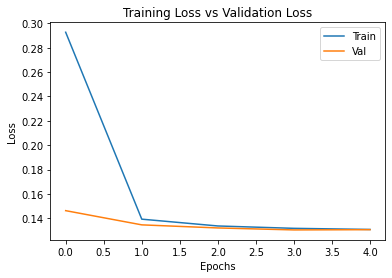

In [67]:
fig, axs = plt.subplots(1,1)
axs.plot(history.history['loss'])
axs.plot(history.history['val_loss'])
axs.title.set_text('Training Loss vs Validation Loss')
axs.set_xlabel('Epochs')
axs.set_ylabel('Loss')
axs.legend(['Train','Val'])

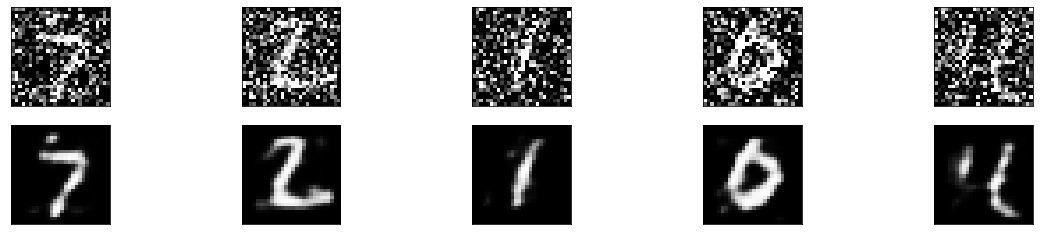

In [59]:
pred = autoencoder.predict(X_test_noisy)
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# As we see that the relation between the classes doesnt differSimple Autoencoder (dimensionality reduction)
## using classes 

In [22]:
class Autoencoder(Model):
  def __init__(self, input_shape):
    super(Autoencoder, self).__init__()
    self.encoder = tf.keras.Sequential([
                                        layers.InputLayer(input_shape),
                                        layers.Flatten(),
                                        layers.Dense(units=128, activation='relu'),
                                        layers.Dense(units=64, activation='relu')])
    
    self.decoder = tf.keras.Sequential([
                                        layers.Dense(units=128, activation='relu'),
                                        layers.Dense(units=784, activation='sigmoid'),
                                        layers.Reshape((28, 28))])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(X_train[0].shape)

In [23]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [24]:
autoencoder.fit(X_train, X_train,
                epochs=10,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/10
313/313 [==============================] - 2s 5ms/step - loss: 0.0544 - val_loss: 0.0308
Epoch 2/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0246 - val_loss: 0.0203
Epoch 3/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0179 - val_loss: 0.0165
Epoch 4/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0149 - val_loss: 0.0142
Epoch 5/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0131 - val_loss: 0.0126
Epoch 6/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0119 - val_loss: 0.0117
Epoch 7/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0110 - val_loss: 0.0108
Epoch 8/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0102 - val_loss: 0.0102
Epoch 9/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0096 - val_loss: 0.0098
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0091 - val_loss: 0.0092

In [25]:
encoded_imgs = autoencoder.encoder(X_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

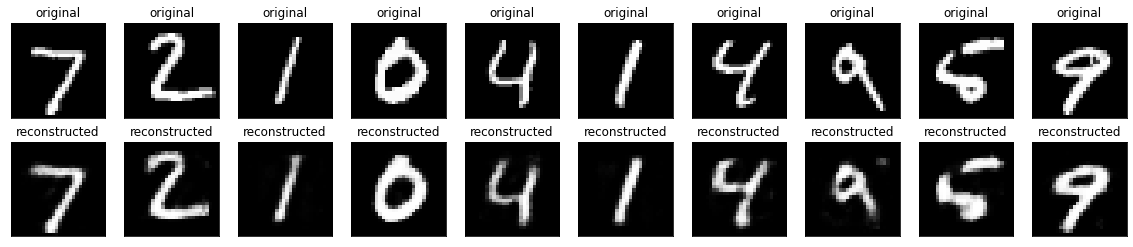

In [26]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

# Simple Autoencoder (dimensionality reduction)
## using functions

In [27]:
def get_encoder(input_shape):
    encoder = tf.keras.Sequential([layers.InputLayer(input_shape),
                                   layers.Flatten(),
                                   layers.Dense(units=128, activation='relu'),
                                   layers.Dense(units=latent_layer, activation='relu')])
    return encoder

In [28]:
def get_decoder(latent_layer):
    decoder = tf.keras.Sequential([layers.Dense(units=128, activation='relu'),
                                   layers.Dense(units=784, activation='sigmoid'),
                                   layers.Reshape((28, 28))])
    return decoder

In [29]:
latent_layer=64
IMG_SHAPE = X_train[0].shape
encoder = get_encoder(X_train[0].shape)
decoder = get_decoder(latent_layer)

In [30]:
input_encoder = layers.Input(IMG_SHAPE)
encoded = encoder(input_encoder) # object that is an output of encoder 
decoded = decoder(encoded)       # we put that into the decoder to reconstruct the image
autoencoder = Model(input_encoder,decoded) # we link them both by creating a Model with the the input_encoder and decoded

In [31]:
#autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [32]:
history=autoencoder.fit(X_train, X_train,
                epochs=20,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/20
313/313 [==============================] - 2s 6ms/step - loss: 0.2188 - val_loss: 0.1506
Epoch 2/20
313/313 [==============================] - 2s 5ms/step - loss: 0.1319 - val_loss: 0.1206
Epoch 3/20
313/313 [==============================] - 2s 5ms/step - loss: 0.1134 - val_loss: 0.1080
Epoch 4/20
313/313 [==============================] - 2s 5ms/step - loss: 0.1042 - val_loss: 0.1016
Epoch 5/20
313/313 [==============================] - 2s 5ms/step - loss: 0.0991 - val_loss: 0.0982
Epoch 6/20
313/313 [==============================] - 2s 5ms/step - loss: 0.0952 - val_loss: 0.0945
Epoch 7/20
313/313 [==============================] - 2s 5ms/step - loss: 0.0924 - val_loss: 0.0920
Epoch 8/20
313/313 [==============================] - 2s 5ms/step - loss: 0.0902 - val_loss: 0.0908
Epoch 9/20
313/313 [==============================] - 2s 5ms/step - loss: 0.0887 - val_loss: 0.0891
Epoch 10/20
313/313 [==============================] - 2s 5ms/step - loss: 0.0873 - val_loss: 0.0882

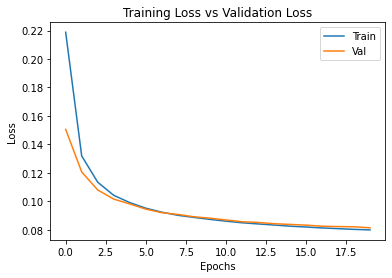

In [33]:
fig, axs = plt.subplots(1,1)
axs.plot(history.history['loss'])
axs.plot(history.history['val_loss'])
axs.title.set_text('Training Loss vs Validation Loss')
axs.set_xlabel('Epochs')
axs.set_ylabel('Loss')
axs.legend(['Train','Val'])

Text(0.5, 1.0, 'decoded')

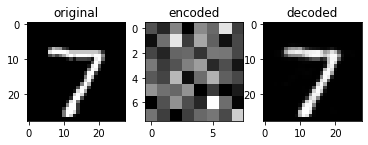

In [39]:
encoded_image = encoder.predict(X_test[0:1])
decoded_image = decoder.predict(encoded_image)
fig,ax=plt.subplots(1,3)
ax[0].imshow(X_test[0])
ax[0].set_title('original')
ax[1].imshow(encoded_image.reshape(8,8))
ax[1].set_title('encoded')
ax[2].imshow(decoded_image[0])
ax[2].set_title('decoded')

Text(0.5, 1.0, 'decoded')

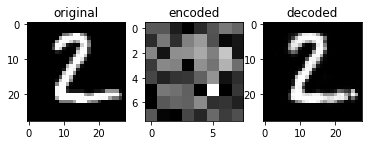

In [41]:
encoded_image = encoder.predict(X_test[1:2])
decoded_image = decoder.predict(encoded_image)
fig,ax=plt.subplots(1,3)
ax[0].imshow(X_test[1])
ax[0].set_title('original')
ax[1].imshow(encoded_image.reshape(8,8))
ax[1].set_title('encoded')
ax[2].imshow(decoded_image[0])
ax[2].set_title('decoded')

The encoded image doesn't make much sense for us, but it's plenty enough for the decoder!!!

In [36]:
X_test[0].shape

(28, 28, 1)

In [37]:
encoded_image.reshape(8,8).shape

(8, 8)

In [38]:
decoded_image[0].shape

(28, 28)